# Gruppioni et al. 2013

### Import and setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Saunders function
def saunders_function(L, alpha, sigma, L_star, phi_star):
    return (phi_star * (L / L_star) ** (1-alpha)) * (np.exp(- (1 / (2 * sigma ** 2)) * (np.log10(1 + (L / L_star)))**2))

# Redshift bins
redshift_bins = [[0.0, 0.3], 
                 [0.3, 0.45], 
                 [0.45, 0.6], 
                 [0.6, 0.8], 
                 [0.8, 1.0], 
                 [1.0, 1.2], 
                 [1.2, 1.7], 
                 [1.7, 2.0], 
                 [2.0, 2.5], 
                 [2.5, 3.0], 
                 [3.0, 4.2]]

# Parameters
alpha = [1.15, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
sigma = [0.52, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
lstar = [10.12, 10.41, 10.55, 10.71, 10.97, 11.13, 11.37, 11.50, 11.60, 11.92, 11.90]
pstar = [-2.29, -2.31, -2.35, -2.35, -2.40, -2.43, -2.70, -3.00, -3.01, -3.27, -3.74]

# Parameter errors
lstar_error = [0.16, 0.03, 0.03, 0.03, 0.04, 0.04, 0.03, 0.03, 0.03, 0.08, 0.16]
pstar_error = [0.06, 0.03, 0.05, 0.06, 0.05, 0.04, 0.04, 0.03, 0.11, 0.18, 0.30]

# Luminosity bins
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

# Phi values
G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

### Luminosity Function

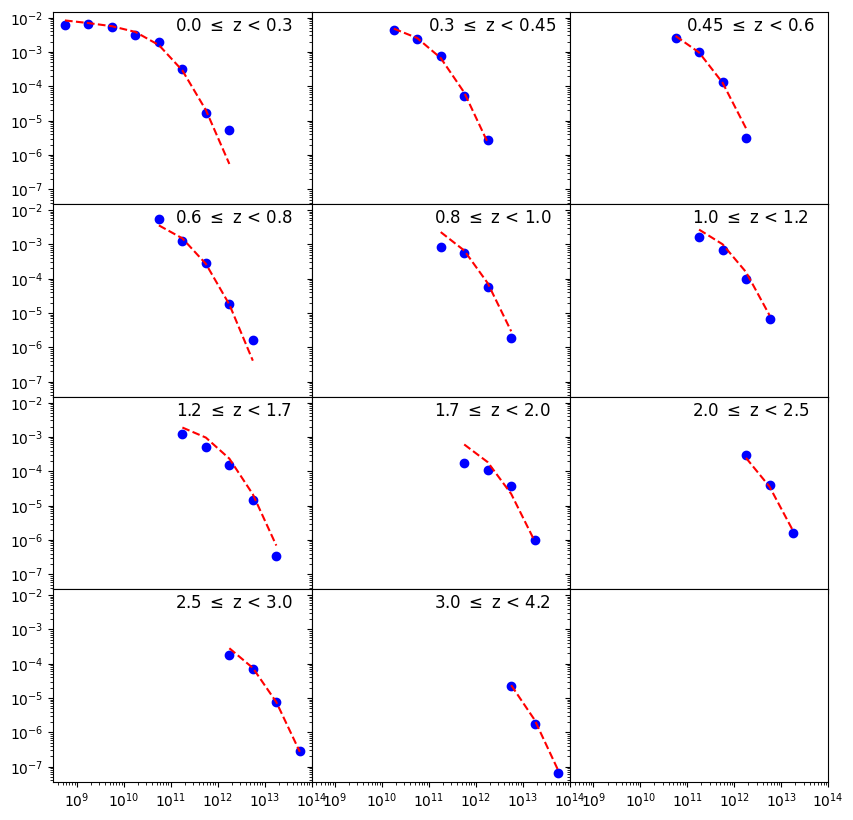

In [2]:
fig, axes = plt.subplots(4, 3, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, L, P, a, s, ls, ps, (z_start, z_end) in zip(axes, G_L, G_P, alpha, sigma, lstar, pstar, redshift_bins):
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7)
    ax.scatter(np.power(10, L), np.power(10, P), color='blue')
    ax.plot(np.power(10, L), saunders_function(np.power(10, L), a, s, 10**ls, 10**ps), color='red', linestyle='--')
    ax.set_yscale('log')
    ax.set_xscale('log')
    
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

### Class Evolution

How does each luminosity bin evolve with redshift?

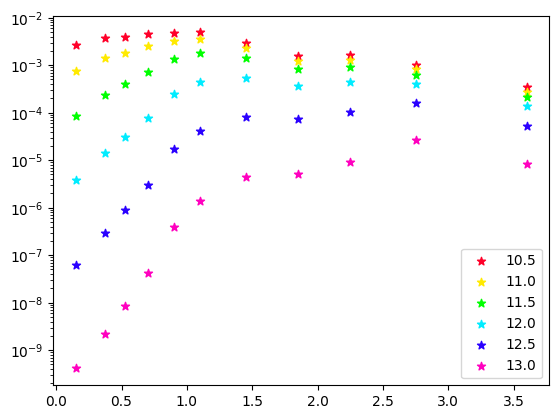

In [3]:
luminosity_classes = np.arange(10.5, 13.5, 0.5)
z = np.mean(redshift_bins, axis=1)
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))

class_phi = []
for lum in luminosity_classes: # Loop over luminosity classes
    lum_phi = []
    for a, s, l, p in zip(alpha, sigma, lstar, pstar): # Loop over redshift bins
        phi = saunders_function(10**lum, a, s, 10**l, 10**p) # Estimate phi
        lum_phi.append(phi)
    class_phi.append(lum_phi)
    
for lclass, c, lum_c in zip(class_phi, colors, luminosity_classes):
    plt.scatter(z, lclass, marker='*', color=c, label=lum_c)
plt.legend()
plt.yscale('log')

### Luminosity Density

Cumulatively sum bound integrands because the quadrature algorithm doesn't work well for small areas over extremely large bounds

Lower Bounds --- [0, 100.0, 10000.0, 1000000.0, 100000000.0, 10000000000.0, 1000000000000.0, 100000000000000.0, 1e+16, 1e+18, 1e+20, 1e+22, 1e+24, 1e+26, 1e+28, 1e+30]
Upper Bounds --- [100.0, 10000.0, 1000000.0, 100000000.0, 10000000000.0, 1000000000000.0, 100000000000000.0, 1e+16, 1e+18, 1e+20, 1e+22, 1e+24, 1e+26, 1e+28, 1e+30, inf] 

Difference --- [0.98 0.99 1.   0.97 0.98 0.97 0.99 0.71 0.97 1.01 1.01]
Average Difference --- 0.96


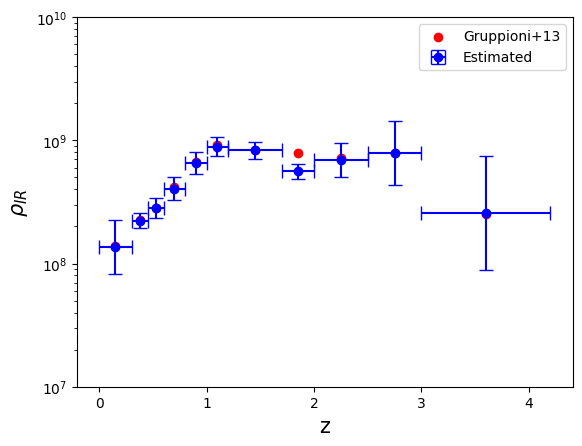

In [5]:
lower_bounds = np.power(10.0, np.arange(0, 32, 2)).tolist()
lower_bounds[0] = 0
upper_bounds = lower_bounds[1:] + [np.inf]

print(f'Lower Bounds --- {lower_bounds}')
print(f'Upper Bounds --- {upper_bounds} \n')

# Y and Y error
density = []
density_up = []
density_down = []

# X error
z_err_left = z - np.array(redshift_bins)[:,0]
z_err_right = np.array(redshift_bins)[:,1] - z

# Loop over redshift bins
for a, s, ls, ps, lse, pse in zip(alpha, sigma, lstar, pstar, lstar_error, pstar_error): 
    bound_area = 0
    bound_area_up = 0
    bound_area_down = 0
    
    # Loop over bounds
    for u, l in zip(upper_bounds, lower_bounds): 
        bound_area += integrate.quad(saunders_function, l, u, args=(a, s, 10**ls, 10**ps))[0] / np.log(10)
        bound_area_up += integrate.quad(saunders_function, l, u, args=(a, s, 10**(ls+lse), 10**(ps+pse)))[0] / np.log(10)
        bound_area_down += integrate.quad(saunders_function, l, u, args=(a, s, 10**(ls-lse), 10**(ps-pse)))[0] / np.log(10)
    
    # Y and Y error
    density.append(bound_area)
    density_up.append(bound_area_up - bound_area)
    density_down.append(bound_area - bound_area_down)

# Paper Luminosity Density
grup_pir = [137890670.60798505, 225275093.33384562, 281586871.7505638, 417018228.2116913, 669239236.9209986, 914619191.7411913, 836528265.90131, 785866610.7290014, 712382395.0419666, 785866610.7290014, 252988497.1601284]
plt.scatter(z, grup_pir, color='red', label='Gruppioni+13')

diff = np.array(density) / np.array(grup_pir)
print(f'Difference --- {np.round(diff,2)}')
print(f'Average Difference --- {np.round(np.mean(diff),2)}')

# Plot
plt.errorbar(z, density, yerr=[density_down, density_up], xerr=[z_err_left, z_err_right], ls='none', marker='o', capsize=5, color='blue', label='Estimated')
plt.ylabel(r'$\rho_{IR}$', fontsize=15)
plt.xlabel('z', fontsize=15)
plt.yscale('log')
plt.ylim(10**7, 10**10)
plt.legend()
plt.show()